# Project 1: First steps in Machine Learning (60+30 Points)
This project is split up into two parts. In the first, you will train and evaluate your first machine learning models. For this part, we provide a structure with a lot of todos guiding you through the work. In the second part, you can choose one of two topics which are a little more advanced and require more own thinking and programming. Here you will work on your own. Of course, the first part gives you an orientation for structuring your work. Please read the following information carefully.

## Grading
You can gain 60 points in the part 1 and 30 in part 2 (note that performing both elective options does not mean that you can get more than 30 points). Besides, each of you can individually gain up to 10 points for creating a good peer-review.

Please follow the **TODO**s for part 1 in this notebook. There are practical and theoretical tasks to do.<br>
When working on the tasks please consider the following information:
* write short texts in **full sentences** answering the TODOs. Note, that analyzing the theoratical parts of the project give roughly 2/3 of all points (at least in part 1)
* when describing classifiers explain at least the training, testing, and the hyper-parameters
* always train and evaluate your models using cross validation
* have a look at all imports in this notebook; they already define which method you should use


## Organizational and Deadline
As we are doing an anonymized peer review, please do not include information like your name, your student id, your grop number or information about your tutorial in here.

On Monday, **November 15th**, there will be a Q&A session in the tutorials! Start to work on this project **from now on** and take the offer to resolve any remaining ambiguity.
This assignment is due on **November 23rd**. Please upload your solution to the Lernraum+ as an ipynb-file.<br>
For a submission you need to be part of a assignment group.

# 1st (mandatory) Part
## kNN - Classifier

In [187]:
import numpy as np
# load dataset_1.npz
# the data and labels are saved in X and y, respectively
data_set = np.load('dataset_1.npz')
X = data_set['X']
y = data_set['y']

### The first dataset

In [188]:
# TODO: take a closer look at the dataset, e.g. number of samples, dimensionality, labels, etc.
print("Samples: " + str(X.size / 2))   #divide by 2, because of 2 dimensions
print("Dimensions: " + str(X.ndim))
Xf1 = X[0:801, 0]
Xf2 = X[0:801, 1]
print("Maximum of Feature 1:   " + str(np.amax(Xf1)))
print("Minimum of Feature 1:   " + str(np.amin(Xf1)))
print("Average of Feature 1:   " + str(np.average(Xf1)))
print("Deviation of Feature 1: " + str(np.std(Xf1)))
print()
print("Maximum of Feature 2:   " + str(np.amax(Xf2)))
print("Minimum of Feature 2:   " + str(np.amin(Xf2)))
print("Average of Feature 2:   " + str(np.average(Xf2)))
print("Deviation of Feature 2: " + str(np.std(Xf2)))
print()
unique, counts = np.unique(y, return_counts=True)
print("Set of labels: " +str(unique))
print("Number of elements with label 0: " + str(counts[0]))
print("Number of elements with label 1: " + str(counts[1]))

Samples: 800.0
Dimensions: 2
Maximum of Feature 1:   2.8448246783194406
Minimum of Feature 1:   -1.3936380815334992
Average of Feature 1:   0.21181324139664512
Deviation of Feature 1: 0.8831455944022223

Maximum of Feature 2:   1.4397948053382816
Minimum of Feature 2:   -1.1206666486856673
Average of Feature 2:   0.2276847969292357
Deviation of Feature 2: 0.5638299963867028

Set of labels: [0 1]
Number of elements with label 0: 400
Number of elements with label 1: 400


**TODO:** Describe the data

### Evaluation Method: Cross Validation

**TODO:** Explain how cross validation works and why it is used for training and evaluating machine learning models.

### the Model

**TODO:** Describe the kNN classifier

In [189]:
# TODO: train and evaluate a kNN classifier with k=5 using cross-validation for training and testing, 
#       and report the accuracy of the model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=5)
cv_results = cross_validate(neigh, X, y, cv=10)
print(cv_results["test_score"])

[0.9375 1.     0.95   0.9875 0.9375 0.9375 0.975  0.975  0.9625 0.9   ]


**TODO:** Report your results.

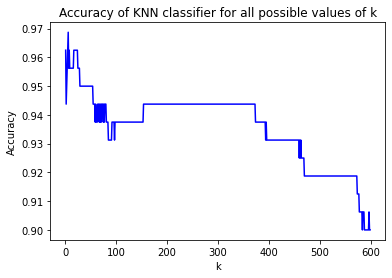

Best score is 0.96875 for k = [6]


In [190]:
# TODO: train and test the kNN classifier for different values of k on dataset 1.
#       Plot the accuracy for different values of k. Choose all possible values for k.
#       
# HINT: Here, you can use a fixed split

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

scores = []
for k in range(1,600):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    scores.append(neigh.score(X_test, y_test))

ks = range(1,600)
plt.plot(ks, scores, 'b-')
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.title("Accuracy of KNN classifier for all possible values of k")
plt.show()

maxscore = np.max(scores)

indices = [i for i, x in enumerate(scores) if x == maxscore]

maxks = [x+1 for x in indices]
print("Best score is " + str(maxscore) + " for k = " + str(maxks))

**TODO:** Answer the following questions in a **full text**.

* Describe your choice of values of k. Why did you choose them?
* For which values of k does the model perform best?
* Would this value perform best on another dataset as well?
* How can k be choosen?
* What is the smallest and the greatest possible value for k? What would happen if we would choose these special values?

## Logistic Regression
Let's try another model as well.

### the Dataset

In [191]:
# TODO: load dataset_2.npz and analyze the dataset (data is stored again in X and in y)
data_set2 = np.load('dataset_2.npz')
X1 = data_set2['X']
y1 = data_set2['y']
print("Samples: " + str(X1.size / 2))   #divide by 2, because of 2 dimensions
print("Dimensions: " + str(X1.ndim))
X1f1 = X1[0:1001, 0]
X1f2 = X1[0:1001, 1]
print("Maximum of Feature 1:   " + str(np.amax(X1f1)))
print("Minimum of Feature 1:   " + str(np.amin(X1f1)))
print("Average of Feature 1:   " + str(np.average(X1f1)))
print("Deviation of Feature 1: " + str(np.std(X1f1)))
print()
print("Maximum of Feature 2:   " + str(np.amax(X1f2)))
print("Minimum of Feature 2:   " + str(np.amin(X1f2)))
print("Average of Feature 2:   " + str(np.average(X1f2)))
print("Deviation of Feature 2: " + str(np.std(X1f2)))
print()
unique, counts = np.unique(y1, return_counts=True)
print("Set of labels: " +str(unique))
print("Number of elements with label 0: " + str(counts[0]))
print("Number of elements with label 1: " + str(counts[1]))

Samples: 1000.0
Dimensions: 2
Maximum of Feature 1:   10.352313894962517
Minimum of Feature 1:   -9.915018776079421
Average of Feature 1:   0.007413666948272919
Deviation of Feature 1: 6.013139474266857

Maximum of Feature 2:   10.23792956340208
Minimum of Feature 2:   -9.890090608954633
Average of Feature 2:   0.5183357738818299
Deviation of Feature 2: 5.967888004425045

Set of labels: [0 1]
Number of elements with label 0: 530
Number of elements with label 1: 470


**TODO:** Describe the data

### the Model

**TODO:** Describe the logistic regression model

1.0
[[ 0.15851487 -0.35758564]]
1.0
[[ 1.37892579 -2.6760758 ]]


<function matplotlib.pyplot.show(close=None, block=None)>

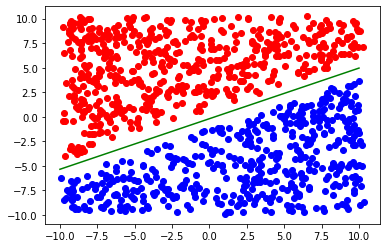

In [200]:
# TODO: * Train and test logistic regression on dataset_2.npz (cross validation),
#       * Plot the dataset and the decision boundary, own implementation needed (see lecture slide 52 in slides1.pdf)
#         where the decision boundary is optimized on the complete dataset (X).

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

logReg = LogisticRegressionCV(cv=10, random_state = 0).fit(X1, y1)
print(logReg.score(X1,y1))
print(logReg.coef_)

logReg2 = LogisticRegression().fit(X1,y1)
print(logReg2.score(X1,y1))
print(logReg2.coef_)

x= np.linspace(-10,10,100)
b = logReg2.intercept_[0]
w1 ,w2 = logReg2.coef_.T
c = -b/w2
m = -w1/w2
xmin, xmax = -10, 10
ymin, ymax = -10, 10
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.scatter(X1[:,0][y1==0], X1[:,1][y1==0], marker='o', c ='r')
plt.scatter(X1[:,0][y1==1], X1[:,1][y1==1], marker='o', c ='b')
plt.plot(xd, yd, '-g')
plt.show

**TODO:** Report your results.

In [193]:
# TODO: Check whether w separates the two classes.
#       How does the negative log-likelihood (NLL) change for αw as α goes to infinity?
#
# Hint: Implement an own function which computes the NLL for a new w, and report the NLL for different values.

**TODO:** What can you infer from your observations regarding the training of a model?

## Comparing kNN and Logistic Regression
We want you to compare the kNN and the logistic regression classifier.

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


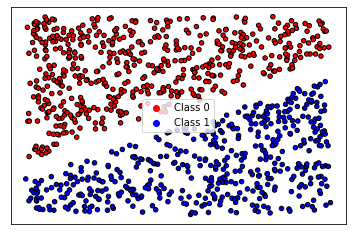

C:\Users\marcel\Desktop\uni\ML\Project 1-20211104\utils.py:82: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


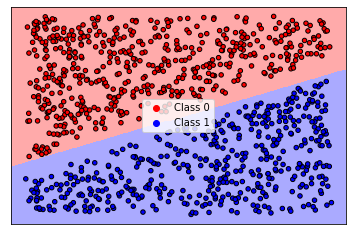

C:\Users\marcel\Desktop\uni\ML\Project 1-20211104\utils.py:82: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


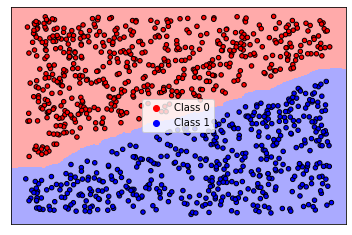

In [194]:
# TODO: * Train both kNN and logistic regression on the training set for both datasets.
#       * Evaluate the models using cross-validation.
#       * Plot the data and the decision boundary of both classifiers for one fold.
#HINT:  plot_2d_decisionboundary() in utils.py can be used.

from utils import plot_2d_decisionboundary
from utils import plot_classification_dataset

logReg3 = LogisticRegressionCV(cv = 10, random_state = 42).fit(X1, y1)

neigh2 = KNeighborsClassifier(n_neighbors=5)
cv_results = cross_validate(neigh2, X1, y1, cv=10)
neigh2.fit(X1,y1)

logreg4 = LogisticRegressionCV(cv = 10, random_state = 42).fit(X, y)

print(cv_results["test_score"])
print(logReg3.score(X1,y1))

plot_classification_dataset(X1,y1)
plot_2d_decisionboundary(logReg3, X1, y1)
plot_2d_decisionboundary(neigh2, X1, y1)

**TODO:** Describe your results and analyze them: Is one model performing better than the other? Is there a difference in the datasets causing this behavior?

# Yet another Dataset

In [195]:
# TODO: * Load dataset_3.npz (data is stored again in X and in y)
#       * Train and report the accuracy for the kNN and the logistic regression classifier.

**TODO:** Describe why the accuracy is not always suitable for evaluating a model's classification performace. Briefly define the alternative metrics from the lecture, and explain in which cases they are more suitable.

In [196]:
# TODO: analyze the dataset; focus on possible reasons for why you might want to apply the metrics described above
#       Your might consider plotting the data.

In [197]:
# TODO: * Reevalute your trained models with the metrics you described above.
#       * Visualize the confusion matrices for all classifiers
# HINT: Take a look at sklearn.metrics. Many metrics are already implemented there and can be used!

**TODO:** Analyze your results, focusing on the metrics used and the models used. Maybe you can also relate your results to the plot of the dataset.

# Part 2 (30 points)
Chose **one** of the following options. Please note that in this part of the assignment you need to come up with a structure for explanations, code and analysis yourself!


### HINTS:
* the following functions may be useful (for finding nearest neighbors):
  * numpy.argsort
  * numpy.linalg.norm


### a) SMOTE _more interesting, maybe slightly harder task_
Read the paper _SMOTE: Synthetic Minority Over-sampling Technique_, which can be found here: https://arxiv.org/abs/1106.1813 and

* describe the method proposed in the paper
* implement the method (own coding required)
* apply SMOTE on datset 3 and evaluate the models on this dataset
* visualize the synthethic samples on a subset of the data
* analyze your results

*Hint:*
* you do not need to read the entire paper in detail. It is sufficient to understand the proposed SMOTE algorithm and why we are going for it.
* when considering the code in the paper, clarify the meaning of the variable N for yourself. Consider the cases where N is smaller than 100 and bigger than 100.

    
OR
### b) Adapting kNN from classificaiton to regression _might be slightly easier_
In the beginning of the lecture, we learnt that classification is only one technique in supervised learning. Another one is regression. Come up with a method to adapt the kNN classifier for regression:

* describe your strategy to adapt the kNN classifier from classification to regression
* implement your proposed method (own coding required, without using kNN regressor in sklearn!)
* show your models performance on dataset_4.npz and analyze your results.



0.18929809348467824
Samples: 100
Dimensions: 1
Maximum of Feature:   6.275746968120228
Minimum of Feature:   0.03112741208135574
Average of Feature:   3.1329024795886933
Deviation of Feature: 1.7994968079525846

Samples: 100
Dimensions: 1
Maximum of Feature:   1.4957003058733305
Minimum of Feature:   -1.2084259859052902
Average of Feature:   -0.0026633066822928275
Deviation of Feature: 0.6918610395448351



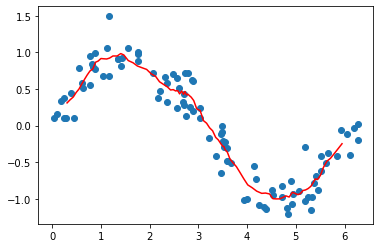

In [198]:
data_set = np.load('dataset_4.npz')
X = data_set['X']
y = data_set['y']
print(X[1])
print("Samples: " + str(X.size))
print("Dimensions: " + str(X.ndim))
print("Maximum of Feature:   " + str(np.amax(X)))
print("Minimum of Feature:   " + str(np.amin(X)))
print("Average of Feature:   " + str(np.average(X)))
print("Deviation of Feature: " + str(np.std(X)))
print()
print("Samples: " + str(y.size))
print("Dimensions: " + str(y.ndim))
print("Maximum of Feature:   " + str(np.amax(y)))
print("Minimum of Feature:   " + str(np.amin(y)))
print("Average of Feature:   " + str(np.average(y)))
print("Deviation of Feature: " + str(np.std(y)))
print()

xy = np.dstack((X,y))

xy_sorted = xy[:,xy[:,:,0].argsort()]

arr = []

k = 10
for p in range(X.size - k + 1):
    arr.append([np.average(xy_sorted[:,:,p:(p+k),0]),np.average(xy_sorted[:,:,p:(p+k),1])])

xs = []
ys = []
for p in arr:
    xs.append(p[0])
    ys.append(p[1])
    
plt.scatter(X,y)
plt.plot(xs,ys,'-r')